In [57]:
%matplotlib inline
import sys
sys.path.append('../../')
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [52]:
from tools.instruments import instruments
from tools.datatools import norm

In [14]:
tdops_50 = h5py.File('../../data/tdop/tdop_decay_50.hdf','r')
tdops_7 = h5py.File('../../data/tdop/tdop_decay_7.hdf','r')

In [161]:
P = instruments['W']
quotes = P.quotes()

In [163]:
quotes[:]

field,open,high,low,close,volume,oi
date,,,,,,
1959-10-01,1803.395020,1803.994873,1802.895020,1803.294922,3525,44311
1959-10-02,1803.294922,1803.694946,1802.895020,1803.594971,3004,44177
1959-10-05,1803.494873,1803.994873,1802.994873,1802.994873,1339,44088
1959-10-06,1802.994873,1803.895020,1802.994873,1803.895020,2321,43892
1959-10-07,1803.895020,1804.294922,1803.694946,1804.294922,1915,43432
...,...,...,...,...,...,...
2022-04-28,1088.000000,1106.500000,1081.000000,1085.750000,28123,179732
2022-04-29,1085.000000,1102.500000,1054.250000,1055.750000,36624,179341
2022-05-02,1049.000000,1071.500000,1034.250000,1055.500000,39695,179240


In [112]:
np.where(np.isclose(prices, 157.3))

(array([], dtype=int64),)

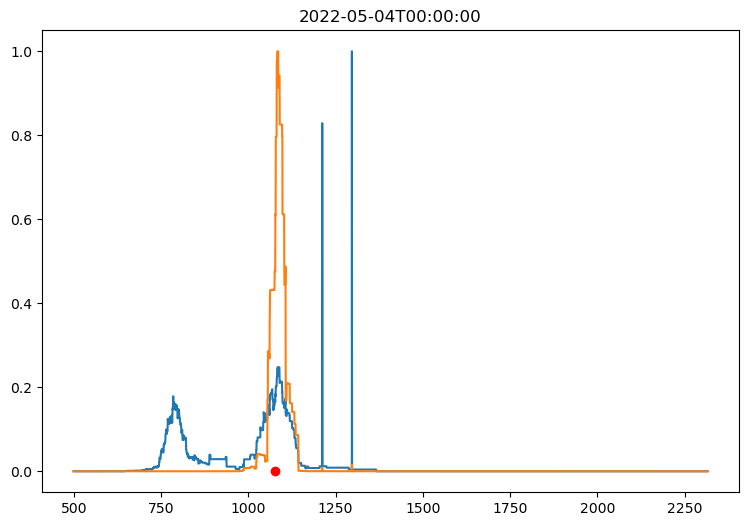

In [166]:
dates = tdops_50[P.symbol]['dates'][:]
prices = tdops_50[P.symbol]['prices'][:]
end = len(dates)
start = len(dates)-750

for idx in range(start, end, 1):
    tdop_50 = tdops_50[P.symbol]['tdop'][idx]
    tdop_7 = tdops_7[P.symbol]['tdop'][idx]
    date = dates[idx]
    close = quotes[quotes.index == dates[idx].astype('M8[s]')]['close'][0]
    close_idx = np.where(np.isclose(prices, close))[0][0]
    
    #tdop1 = tdops1[idx]
    #tdop2 = tdops2[idx]
    #atr = int(ohlc.loc[date].ATR/pinfo['tick_unit'] )
    
    #tdop2 = norm(tdop2, ntype='minmax')
    #tdop1 = norm(tdop1, ntype='minmax')
    normtdop_50 = norm(tdop_50, ntype='minmax')
    normtdop_7 = norm(tdop_7, ntype='minmax')
    
    #top = tdop.argmax()
    #top2 = tdop2.argmax()
    x=prices #np.arange(len(tdop1))
    
    #cond1 = np.where(tdop1>0.001)[0]
    #cond2 = np.where(tdop2>0.001)[0]
    
    #left1 = cond1.min()
    #right1 = cond1.max()
    #left2 = cond2.min()
    #right2 = cond2.max()
    
    #sp1 = split(np.where(tdop1>10)[0], tdop1.argmax())[0]
    #sp2 = split(np.where(tdop2>10)[0], tdop2.argmax())[0]
    
    plt.figure().set_size_inches(9,6)
    plt.title(date.astype('M8[s]'))
    plt.plot(prices, normtdop_50)
    plt.plot(prices, normtdop_7)
    plt.scatter(close,0,color='red')
    #plt.scatter(close,normtdop_7[close_idx],color='purple')
    
    #plt.scatter(x[left1], tdop1[left1], color='red')
    #plt.scatter(x[right1], tdop1[right1], color='red')
    #plt.scatter(x[left2], tdop1[left2], color='blue')
    #plt.scatter(x[right2], tdop1[right2], color='blue')
    #plt.plot(x[sp1],tdop1[sp1])
    #plt.plot(x[sp2], tdop2[sp2])
    
    #plt.axes().axvline(pidx, color='black')
    plt.show()
    time.sleep(0.3)
    clear_output(wait=True)

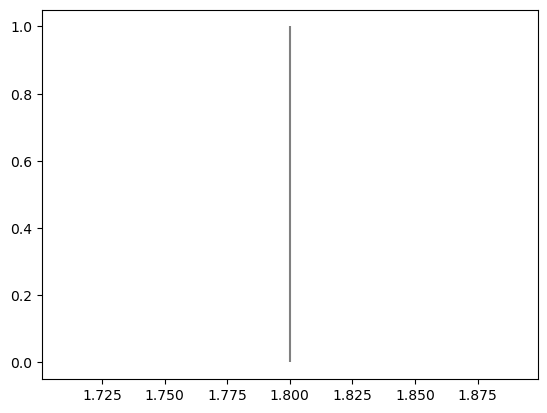

In [76]:
plt.vlines(1.8, 0, 1, color='gray', linestyle='solid')

In [62]:
tdops_50['AD']['prices'][:].min()

-0.0064

In [63]:
tdops_50['AD']['prices'][:].max()

0.99575

In [64]:
tdops_7['AD']['prices'][:].min()

-0.0064

In [65]:
tdops_7['AD']['prices'][:].max()

0.99575

In [67]:
tdops_50['AD']['prices'][:][0]

-0.0064

In [68]:
tdops_7['AD']['prices'][:][0]

-0.0064

In [42]:
str(prices)

'[-0.0064  -0.00635 -0.0063  ...  0.99565  0.9957   0.99575]'